In [3]:
import numpy as np

# 模擬原始資料的結構 (因為無法訪問真實的 .npy，這裡先造假)
# 你自己本地已經產生過 X_demo.npy 和 r_peaks_demo.npy
X_detrended_demo = np.random.randn(100, 5000, 12)

# 生成模擬的 R 峰資料 (每筆是 list of int)
r_peaks_demo = np.empty((100, 12), dtype=object)
for i in range(100):
    for j in range(12):
        r_peaks = np.arange(200, 5000, 300) + np.random.randint(-10, 10, size=16)  # 模擬 R 峰
        r_peaks_demo[i, j] = r_peaks

# 檢查 shape 確認
X_detrended_demo.shape, r_peaks_demo.shape


((100, 5000, 12), (100, 12))

In [7]:
import matplotlib.pyplot as plt

def plot_ecg_and_r_peaks(X, r_peaks_all, patient_index=0, lead_index=0):
    ecg_signal = X[patient_index, :, lead_index]
    r_peaks = r_peaks_all[patient_index, lead_index]

    plt.figure(figsize=(20, 6))
    plt.plot(ecg_signal, label='ECG Signal')

    if isinstance(r_peaks, (np.ndarray, list)):
        for r in r_peaks:
            if 0 <= r < len(ecg_signal):
                plt.plot(r, ecg_signal[r], 'ro')
                plt.annotate('R', (r, ecg_signal[r]), textcoords="offset points", xytext=(-10, -10), ha='center')

    plt.title(f"Patient {patient_index+1}, Lead {lead_index+1}")
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


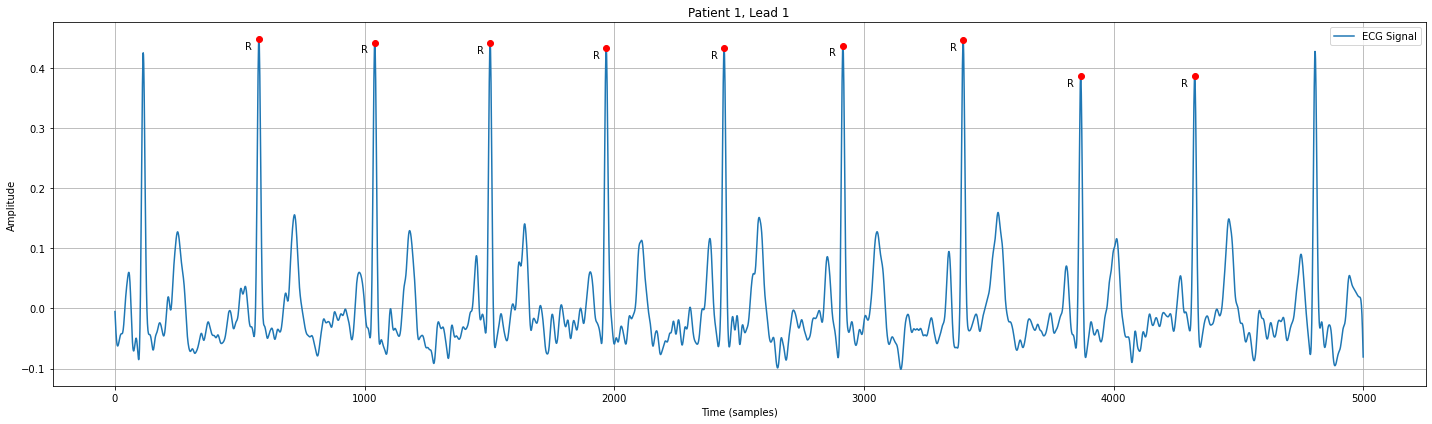

In [8]:
plot_ecg_and_r_peaks(X_detrended, r_peaks_all_patients, patient_index=0, lead_index=0)
